In [150]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import floor

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

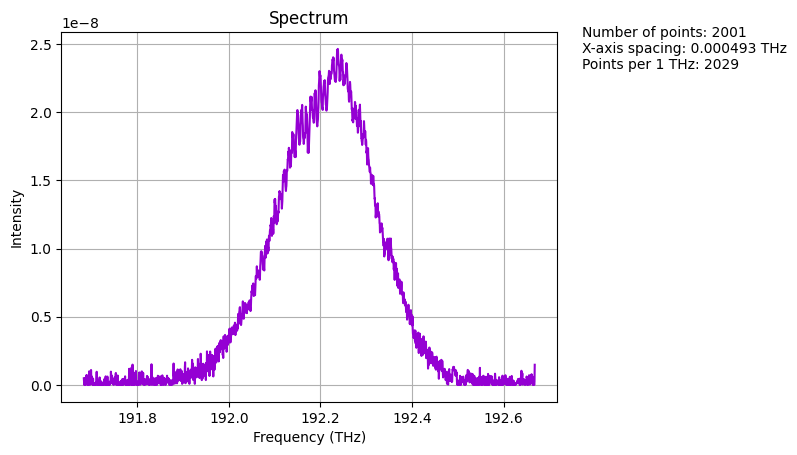

In [151]:
real_spectrum = sa.load_csv("data/v1_not_sheared.csv")
real_spectrum.wl_to_freq()
real_spectrum.constant_spacing()
sa.plot(real_spectrum)

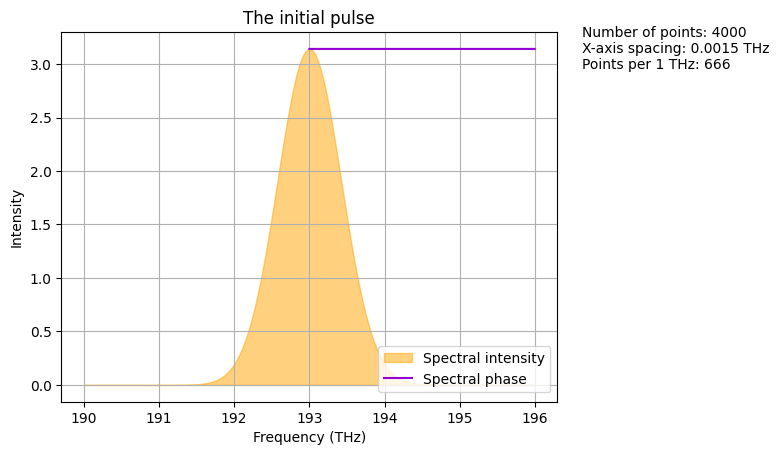

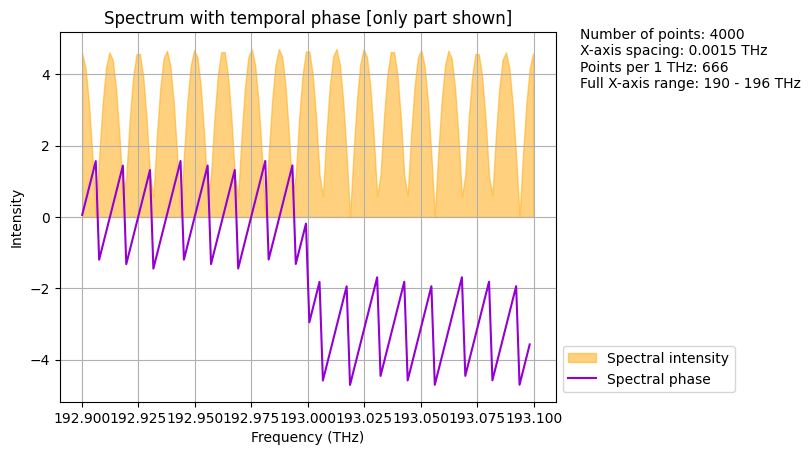

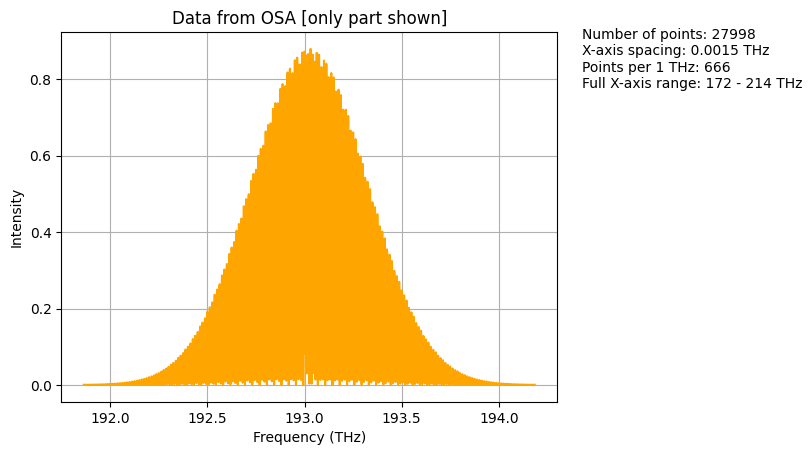

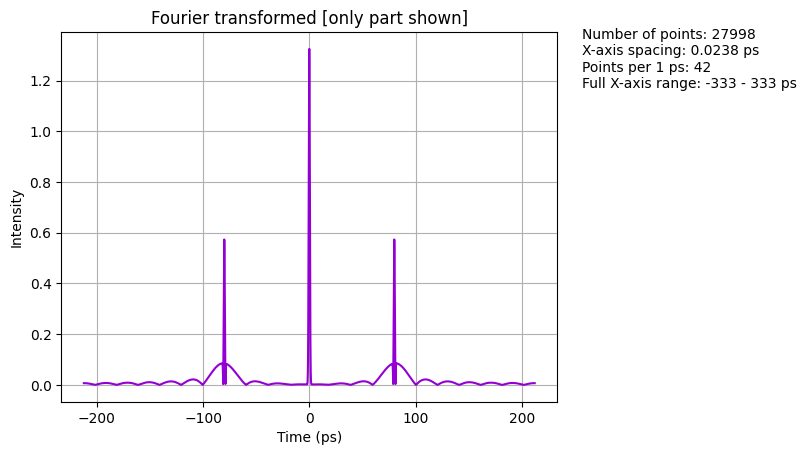

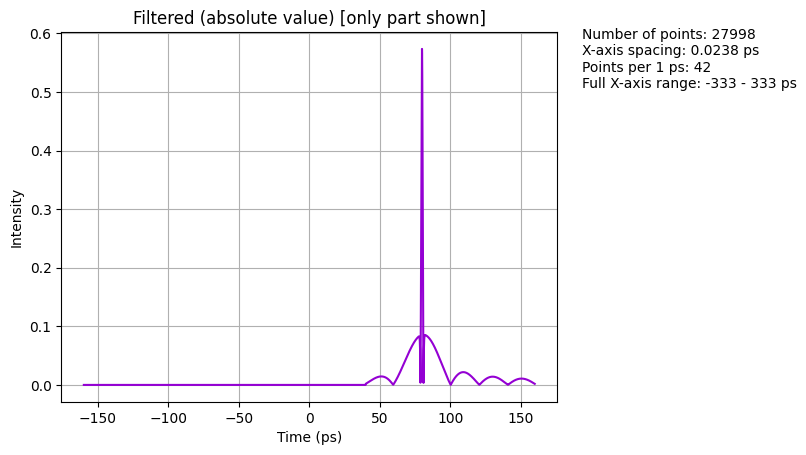

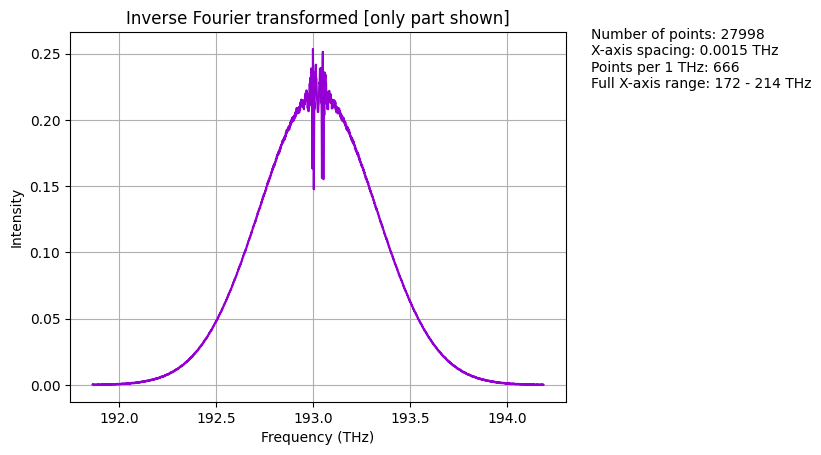

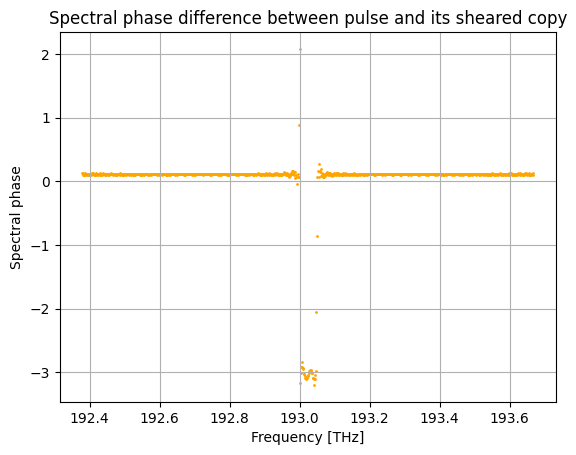

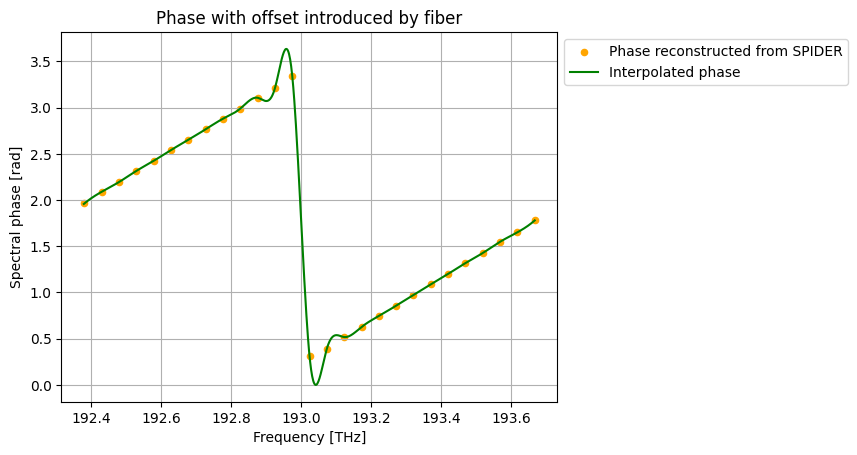

d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_axes.py:5408: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
d:\Users\rewas\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


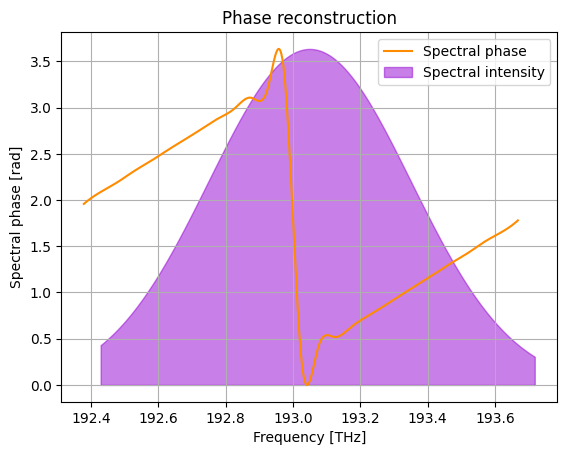

In [152]:
# prepare the input

pulse = sa.gaussian_pulse([190, 196], 193, 1, num = 4000)
zero_pulse = pulse.copy()
zero_pulse.Y = zero_pulse.Y*0
the_beam = sa.beam(pulse, zero_pulse)

# prepare the phase

phase = zero_pulse.X.copy() - np.mean(zero_pulse.X)
phase = np.sign(phase)
phase[phase == 0] = 1
phase += 1
phase /= 2
phase *= np.pi

for i in range(floor(len(phase)/4), floor(len(phase)/4*3)):
    break
    phase[i] = np.mean(phase[i-50: i+50])

#phase = sa.hermitian_pulse(1, [190, 196], 193, 2, num = 10000).Y
# add phase

the_beam.ver.Y = the_beam.ver.Y*np.exp(1j*phase)
sa.plot(the_beam.ver, what_to_plot = "trigonometric", title = "The initial pulse")

# simulation

for i in range(2):
    a_beam = the_beam.copy()
    a_beam.rotate(np.pi/4)
    a_beam.delay("ver", 80)
    if i == 0:
        a_beam.shear("ver", 0.05)
    a_beam.rotate(np.pi/4)
    a_beam.polarizer("ver")
    if i == 0:
        p_spectrum = a_beam.OSA(start = 191, end = 195, show_plot = False)
    elif i == 1:
        t_spectrum = a_beam.OSA(show_plot = False)
sa.plot(a_beam.ver, what_to_plot = "trigonometric", title = "Spectrum with temporal phase", start = 192.9, end = 193.1)
# spider

IFT = sa.spider(phase_spectrum = p_spectrum,
          temporal_spectrum = t_spectrum,
          shear = 0.05,
          plot_steps = True,
          plot_phase_inter = True,
          what_to_return = "IFT")

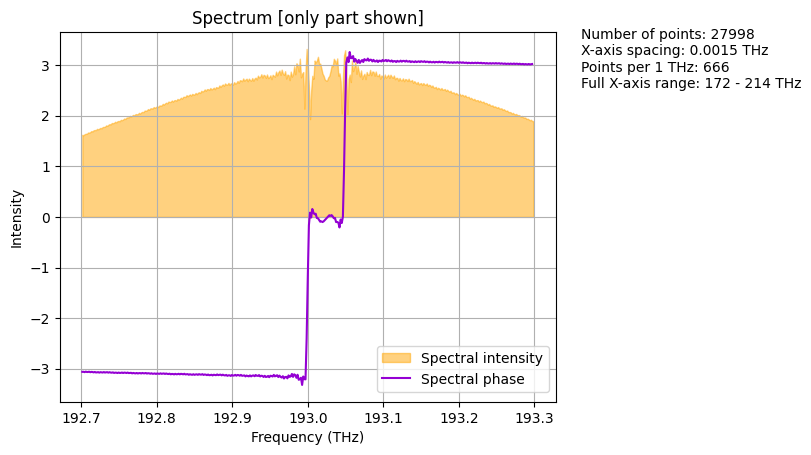

In [153]:
s = IFT.copy()
s.Y *= np.exp(-s.X*503j)

sa.plot(s, start = 192.7, end = 193.3, what_to_plot = "trigonometric")